In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
df=pd.read_csv(r"C:\Users\SIDDA CHETAN REDDY\Downloads\filled_Cleaned_Ambition_Box.csv")
df

,Company_Name,Rating,Industry_Type,Locations,AvgSalaries,Total_Interviews,Total_Jobs,Total_Positive_Reviews
0,TCS,3.7,IT Services & Consulting,Bangalore / Bengaluru +383 other locations,860000,10400,216.0,87300
1,Accenture,3.9,IT Services & Consulting,Bangalore / Bengaluru +198 other locations,580000,8200,20000.0,54800
2,Wipro,3.7,IT Services & Consulting,Bangalore / Bengaluru +341 other locations,450000,5600,851.0,51800
3,Cognizant,3.8,IT Services & Consulting,Chennai +193 other locations,560000,5600,320.0,48900
4,Capgemini,3.7,IT Services & Consulting,Bangalore / Bengaluru +160 other locations,430000,4800,1400.0,40500
...,...,...,...,...,...,...,...,...
595,Relaxo Footwear,4.2,Fashion & Textile,New Delhi +136 other locations,4200,81,45.0,1300
596,Medanta the Medicity,4.1,Healthcare,Gurgaon / Gurugram +36 other locations,4600,92,58.0,1300
597,Vardhman Fabrics,4.0,Fashion & Textile,Baddi +51 other locations,5100,60,26.0,1300
598,Security and Intelligence Services (India),4.2,Law Enforcement & Security,New Delhi +167 other locations,4100,55,295.0,1300


In [6]:
df.dtypes

Company_Name         object
Rating              float64
Industry_Type        object
Locations            object
AvgSalaries           int64
Total_Interviews      int64
Total_Jobs          float64
Total_Reviews         int64
dtype: object

## 1. Top 20 Companies Based On Total Positive Reviews
Visualization: Horizontal Bar Chart
Code:

Insight:

TCS, Accenture, and Wipro have the most reviews, implying higher transparency.

Companies with more reviews provide richer data for job seekers to evaluate.

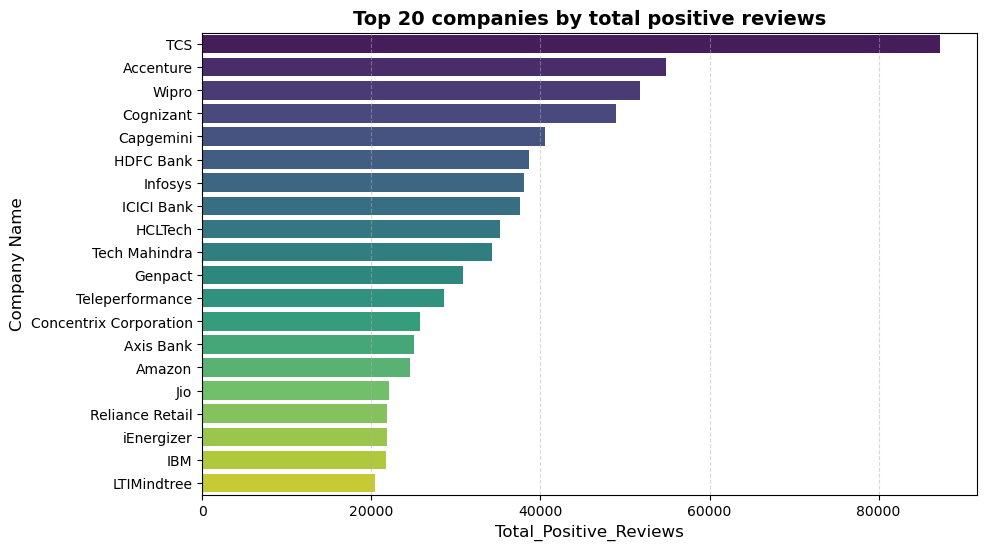

In [42]:
top_reviewed_companies = df[['Company_Name', 'Total_Positive_Reviews']].sort_values(by='Total_Positive_Reviews', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Positive_Reviews', y='Company_Name', data=top_reviewed_companies, palette='viridis')
plt.title("Top 20 companies by total positive reviews", fontsize=14, fontweight='bold')
plt.xlabel("Total_Positive_Reviews", fontsize=12)
plt.ylabel("Company Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## 2. Distribution of Company Ratings
Visualization: Histogram with KDE
Insight:

- Most companies have ratings between 3.5 and 4.2, indicating generally positive reviews.

- Few companies have very low (<3.0) or very high (>4.5) ratings.

- Helps job seekers identify companies with outlier ratings (e.g., exceptionally good or poor).



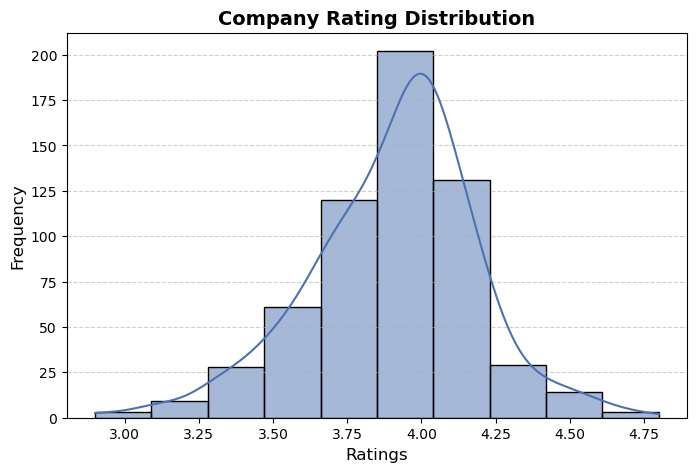

In [91]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=10, kde=True, color='#4C72B0', edgecolor="black")
plt.title("Company Rating Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


## 3. Average Salary by Industry
Visualization: Bar Chart

Insight:

- IT Services & Consulting, Software Product, and Financial Services are top-paying industries.

- Job seekers can target industries aligned with their salary expectations.

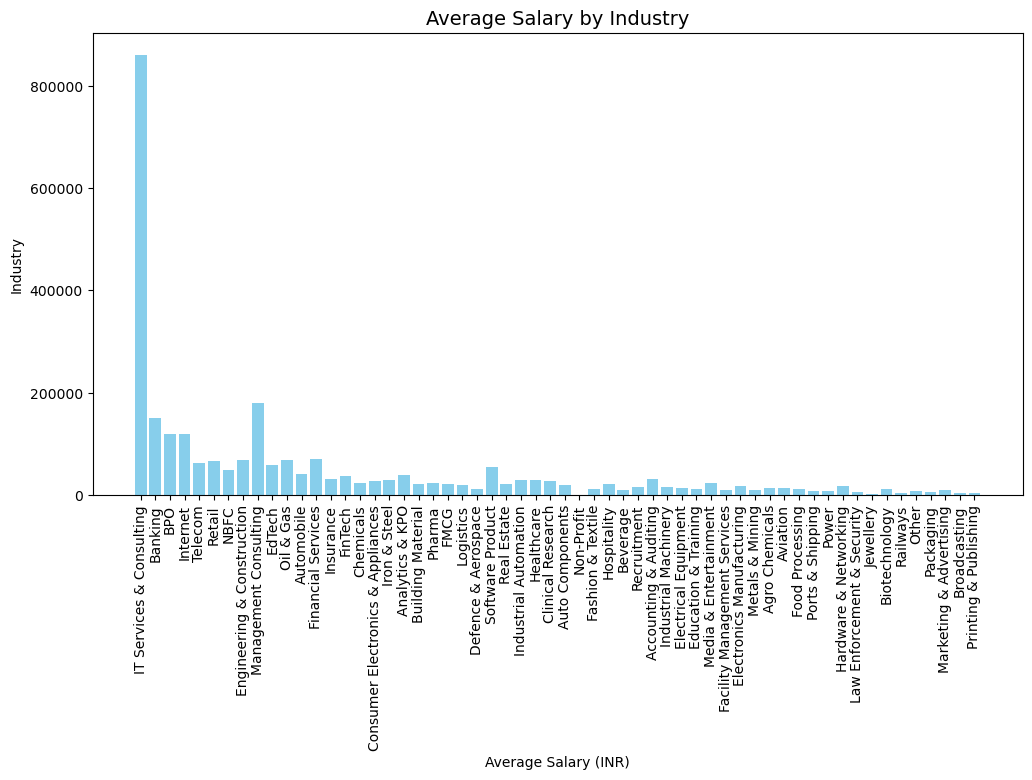

In [136]:
plt.figure(figsize=(12, 6))
plt.bar(df['Industry_Type'],df['AvgSalaries'], color='skyblue')
plt.title('Average Salary by Industry', fontsize=14)
plt.xlabel('Average Salary (INR)')
plt.ylabel('Industry')
plt.xticks(rotation=90)
plt.show()

## 4. Rating vs. Avg Salary using Scatter plot
Visualization: Scatter Plot
Insight:

- No strong correlation between ratings and salaries.

- High salaries exist across all rating ranges (e.g., TCS has a moderate rating but high salary).

- Job seekers must prioritize either salary or culture independently.

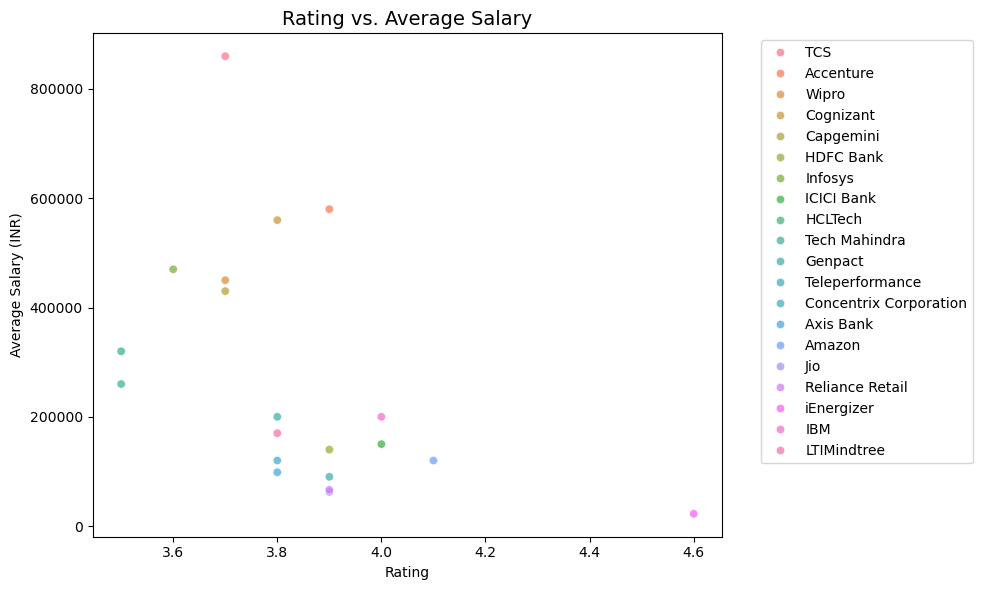

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.head(20), x='Rating', y='AvgSalaries', hue='Company_Name', alpha=0.7)
plt.title('Rating vs. Average Salary', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Average Salary (INR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 5. Correlation Heatmap
Visualization: Heatmap

Insight:

- Total_Reviews strongly correlates with Total_Jobs (0.72), indicating companies with more jobs attract more reviews.

- AvgSalaries has weak correlation with other metrics, reinforcing the need to analyze salaries separately.

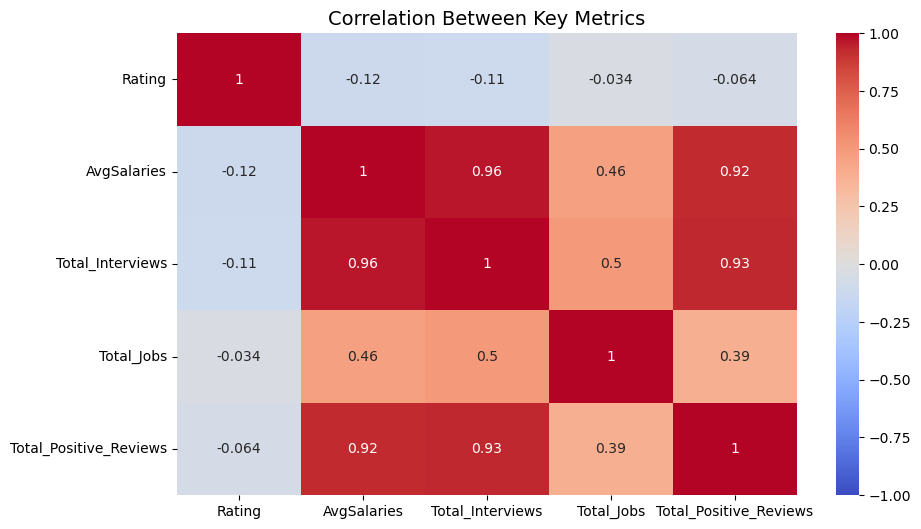

In [80]:
numeric_cols = ['Rating', 'AvgSalaries', 'Total_Interviews', 'Total_Jobs', 'Total_Positive_Reviews']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Key Metrics', fontsize=14)
plt.show()

## 6. Industry-Wise Distribution of Ratings
Visualization: Boxplot

Insight:

- Defence & Aerospace and Oil & Gas have consistently high ratings.

- EdTech and BPO show wider rating variability, suggesting inconsistent workplace experiences.

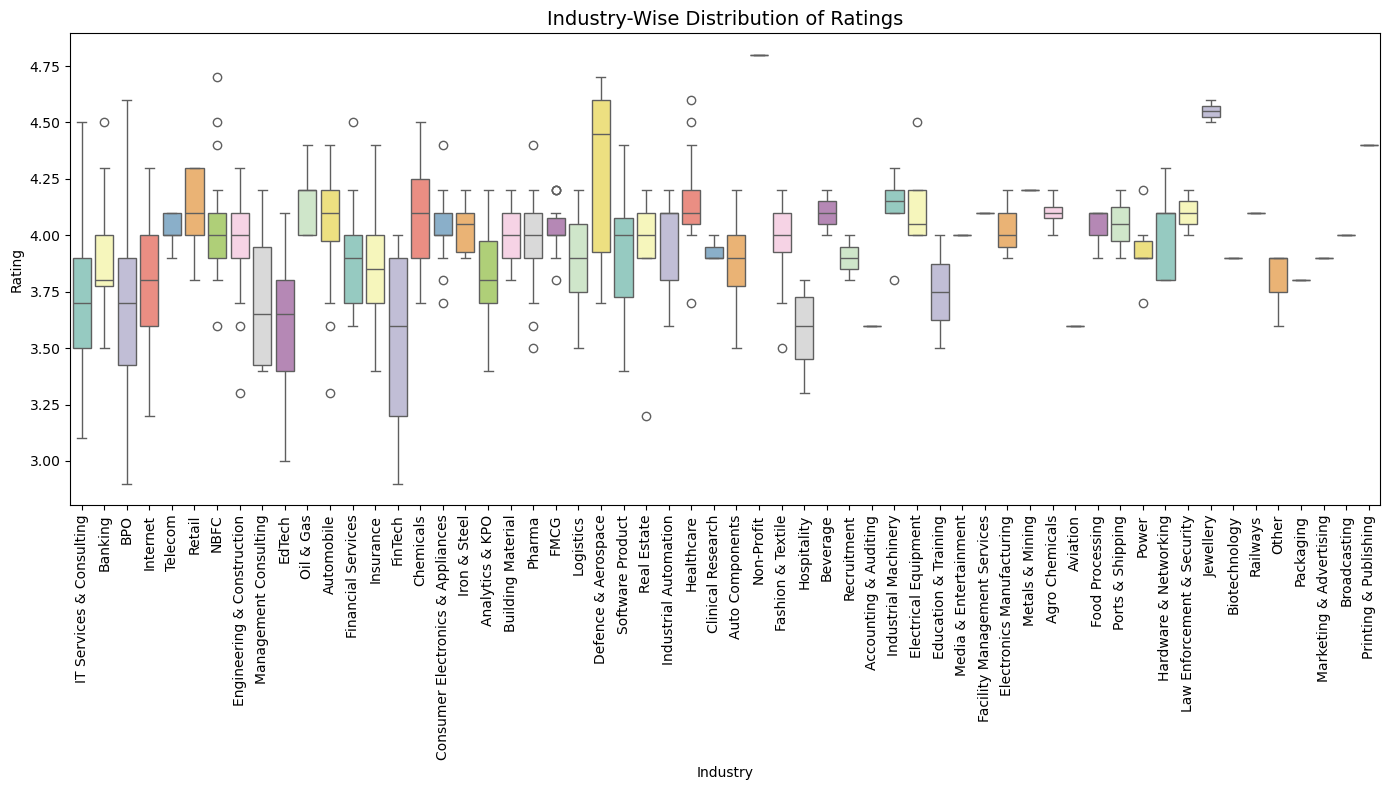

In [85]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Industry_Type', y='Rating', palette='Set3')
plt.title('Industry-Wise Distribution of Ratings', fontsize=14)
plt.xlabel('Industry')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 7.Key Insights:
IT Services & Consulting dominates with the largest share of jobs.

Banking and BPO follow as significant contributors.

Smaller industries are grouped under "Other" for clarity.

This visualization highlights which industries offer the most job opportunities based on the dataset.

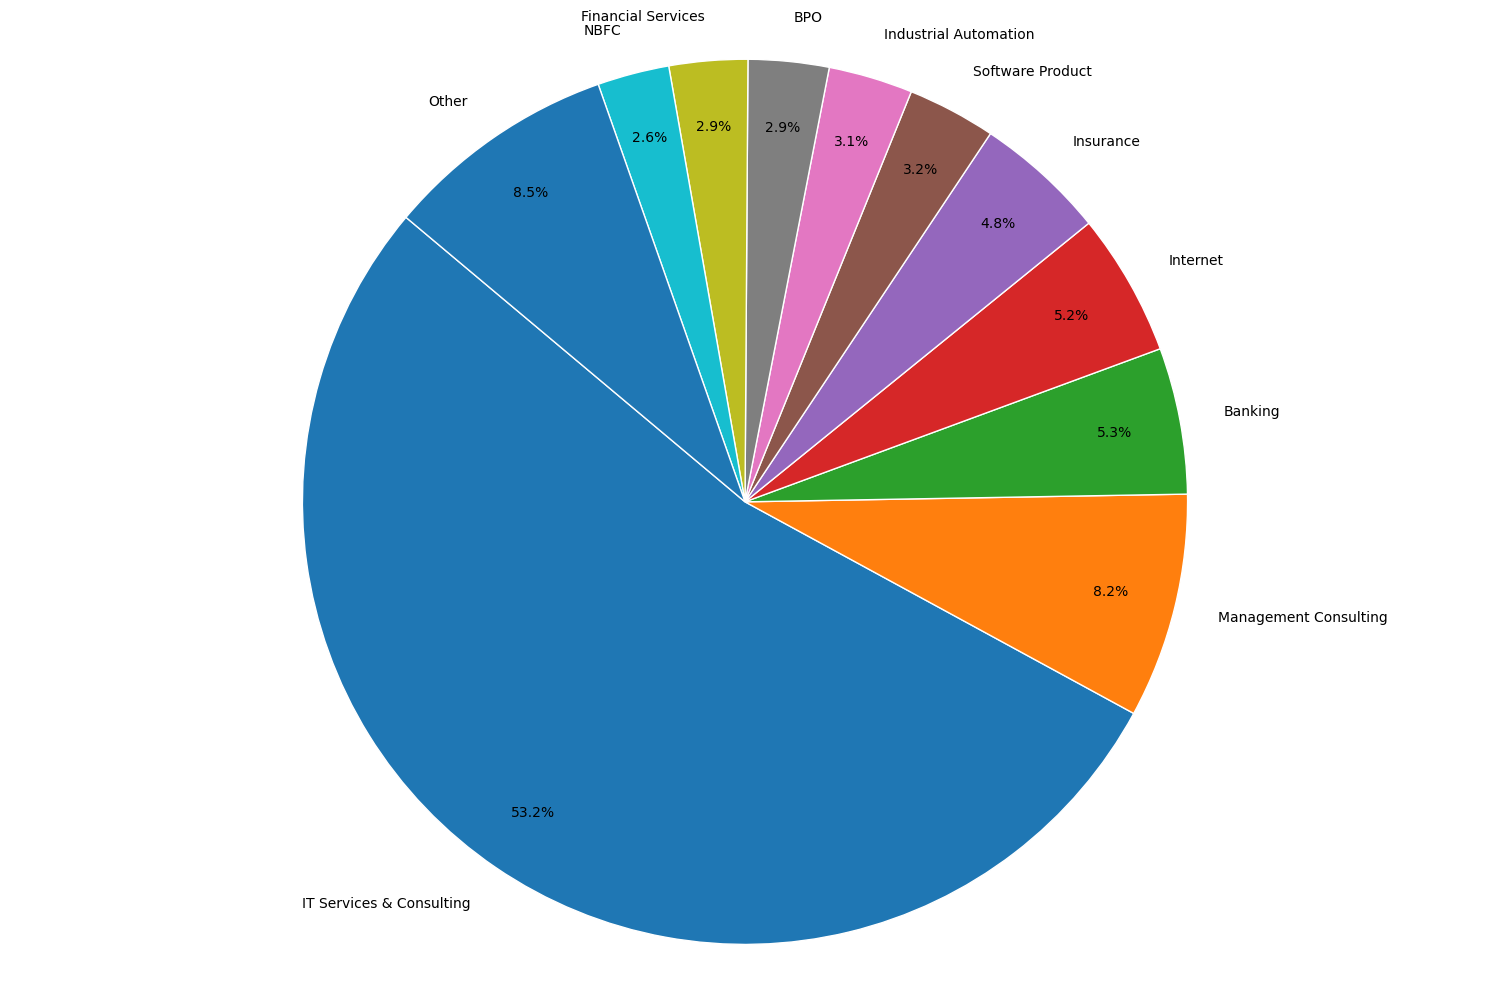

In [146]:
# Group by Industry_Type and sum Total_Jobs
industry_jobs = df.groupby('Industry_Type')['Total_Jobs'].sum().sort_values(ascending=False)
top_industries = industry_jobs.head(10)
other_jobs = industry_jobs[20:].sum()
top_industries['Other'] = other_jobs

# Plot
plt.figure(figsize=(15, 10))
plt.pie(
    top_industries,
    labels=top_industries.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white'})
#plt.title('Distribution of Total Jobs by Industry', fontsize=16)
plt.axis('equal')  # Equal aspect ratio for a circular pie
plt.tight_layout()
plt.show()